In [85]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import cv2 
 
# defining global variable path 
image_path = "images" 
 
'''function to load folder into arrays and  
then it returns that same array''' 
def loadImages(path): 
    # Put files into lists and return them as one list of size 4 
    image_files = sorted([os.path.join(path, 'cropped', file) 
         for file in os.listdir(path + "/cropped") if      file.endswith('.jpg')]) 
  
    return image_files 

In [86]:
images = loadImages(image_path)

print(images)

['images\\cropped\\Bananas_1.jpg', 'images\\cropped\\Bananas_10.jpg', 'images\\cropped\\Bananas_100.jpg', 'images\\cropped\\Bananas_101.jpg', 'images\\cropped\\Bananas_102.jpg', 'images\\cropped\\Bananas_103.jpg', 'images\\cropped\\Bananas_104.jpg', 'images\\cropped\\Bananas_105.jpg', 'images\\cropped\\Bananas_106.jpg', 'images\\cropped\\Bananas_107.jpg', 'images\\cropped\\Bananas_108.jpg', 'images\\cropped\\Bananas_109.jpg', 'images\\cropped\\Bananas_11.jpg', 'images\\cropped\\Bananas_110.jpg', 'images\\cropped\\Bananas_111.jpg', 'images\\cropped\\Bananas_112.jpg', 'images\\cropped\\Bananas_113.jpg', 'images\\cropped\\Bananas_114.jpg', 'images\\cropped\\Bananas_115.jpg', 'images\\cropped\\Bananas_116.jpg', 'images\\cropped\\Bananas_117.jpg', 'images\\cropped\\Bananas_118.jpg', 'images\\cropped\\Bananas_119.jpg', 'images\\cropped\\Bananas_12.jpg', 'images\\cropped\\Bananas_120.jpg', 'images\\cropped\\Bananas_121.jpg', 'images\\cropped\\Bananas_122.jpg', 'images\\cropped\\Bananas_123.jp

In [87]:
# Display one image 
def display_one(a, title1 = "Original"): 
    plt.imshow(a), plt.title(title1) 
    plt.xticks([]), plt.yticks([]) 
    plt.show() 
# Display two images 
def display(a, b, title1 = "Original", title2 = "Edited"): 
    plt.subplot(121), plt.imshow(a), plt.title(title1) 
    plt.xticks([]), plt.yticks([]) 
    plt.subplot(122), plt.imshow(b), plt.title(title2) 
    plt.xticks([]), plt.yticks([]) 
    plt.show() 
# Preprocessing 
def processing(data): 
    # loading image 
    # Getting 3 images to work with  
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]] 
    print('Original size',img[0].shape) 
    # -------------------------------- 
    # setting dim of the resize 
    height = 220 
    width = 220 
    dim = (width, height) 
    res_img = [] 
    for i in range(len(img)): 
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR) 
        res_img.append(res) 
 
    # Checcking the size 
    print("RESIZED", res_img[1].shape) 
     
    # Visualizing one of the images in the array 
    original = res_img[1] 
    display_one(original) 

    # ---------------------------------- 
    # Remove noise 
    # Gaussian 
    no_noise = [] 
    for i in range(len(res_img)): 
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0) 
        no_noise.append(blur) 
    
    
    image = no_noise[1] 
    display(original, image, 'Original', 'Blured') 
    #--------------------------------- 

    # Segmentation 
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) 
    
    # Displaying segmented images 
    display(original, thresh, 'Original', 'Segmented') 

    # Displaying gray images 
    display(original, gray, 'Original', 'Gray') 

In [88]:
data = loadImages(image_path)

Original size (750, 600, 3)
RESIZED (220, 220, 3)


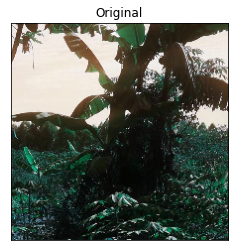

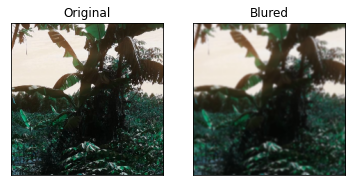

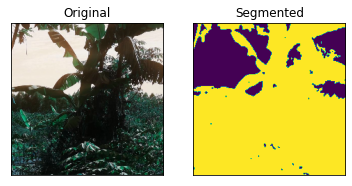

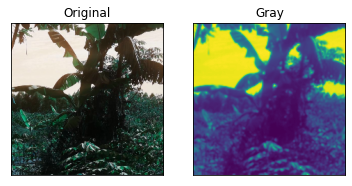

In [89]:
processing(data)

gray scale pixel values as features


In [90]:
#pixel features

img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data ]
 # setting dim of the resize 
height = 220 
width = 220 
dim = (width, height) 
res_img = [] 
for i in range(len(img)): 
    res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR) 
    gray = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY) 
    res_img.append(gray) 



In [91]:
all_features = []
for i in range(len(res_img)):
    #print(res_img[i].shape)
    features = np.reshape(res_img[i], (220*220))
    all_features.append(features) 
    print((features))
    

[203 102  57 ...  37  33  40]
[ 65 112  95 ...  29  23  21]
[29 31 29 ... 51 22 84]
[ 29  28  31 ... 133  12  19]
[ 75 177 241 ...  20  29  59]
[ 28  27  37 ... 145  72  28]
[51 29 32 ... 29 31 18]
[27 33 29 ... 11 74 19]
[32 36 31 ... 13 38 11]
[34 34 32 ... 18 89 13]
[30 32 33 ... 11 88 15]
[32 33 30 ... 15 46 11]
[ 99 121  98 ...  28  22  31]
[56 32 34 ... 19 60 15]
[30 29 40 ... 37 36 18]
[27 46 34 ... 43 32 12]
[77 66 59 ... 50 31 58]
[167 104 235 ...  22  31  72]
[31 28 33 ... 26 27 18]
[36 27 27 ... 20 19 23]
[29 27 27 ... 20 19 22]
[30 26 27 ... 21 19 25]
[26 28 28 ... 16 15 17]
[174 233 229 ...  27  24  37]
[30 28 28 ... 42 18 10]
[29 31 31 ... 37 41 58]
[27 29 30 ... 15 42 33]
[28 30 30 ... 18 24 32]
[34 33 34 ... 61 17 38]
[211 173 151 ...  22  29  35]
[34 31 32 ... 22 18 27]
[223 140 201 ...  29  26  41]
[201 114 209 ...  20  21  39]
[232 238 239 ...  64  21  29]
[ 42 235 228 ...  26  22  40]
[233 237 221 ...  47  23  26]
[233 233 237 ...  22  18  27]
[233 233 233 ...  34  

In [92]:
import pandas as pd

We add the images path to a data frame

In [93]:
df_images = pd.DataFrame(data)

df_images

,0
0,images\cropped\Bananas_1.jpg
1,images\cropped\Bananas_10.jpg
2,images\cropped\Bananas_100.jpg
3,images\cropped\Bananas_101.jpg
4,images\cropped\Bananas_102.jpg
...,...
417,images\cropped\Cassava_95.jpg
418,images\cropped\Cassava_96.jpg
419,images\cropped\Cassava_97.jpg
420,images\cropped\Cassava_98.jpg


In [94]:
type(all_features)
all_features

[array([203, 102,  57, ...,  37,  33,  40], dtype=uint8),
 array([ 65, 112,  95, ...,  29,  23,  21], dtype=uint8),
 array([29, 31, 29, ..., 51, 22, 84], dtype=uint8),
 array([ 29,  28,  31, ..., 133,  12,  19], dtype=uint8),
 array([ 75, 177, 241, ...,  20,  29,  59], dtype=uint8),
 array([ 28,  27,  37, ..., 145,  72,  28], dtype=uint8),
 array([51, 29, 32, ..., 29, 31, 18], dtype=uint8),
 array([27, 33, 29, ..., 11, 74, 19], dtype=uint8),
 array([32, 36, 31, ..., 13, 38, 11], dtype=uint8),
 array([34, 34, 32, ..., 18, 89, 13], dtype=uint8),
 array([30, 32, 33, ..., 11, 88, 15], dtype=uint8),
 array([32, 33, 30, ..., 15, 46, 11], dtype=uint8),
 array([ 99, 121,  98, ...,  28,  22,  31], dtype=uint8),
 array([56, 32, 34, ..., 19, 60, 15], dtype=uint8),
 array([30, 29, 40, ..., 37, 36, 18], dtype=uint8),
 array([27, 46, 34, ..., 43, 32, 12], dtype=uint8),
 array([77, 66, 59, ..., 50, 31, 58], dtype=uint8),
 array([167, 104, 235, ...,  22,  31,  72], dtype=uint8),
 array([31, 28, 33, ..

Add features to Data Frame

In [95]:
df_features = pd.DataFrame(all_features)

In [96]:
df_features

,0,1,2,3,4,5,6,7,8,9,...,48390,48391,48392,48393,48394,48395,48396,48397,48398,48399
0,-53,102,57,-119,-56,-34,-28,-31,-43,89,...,37,30,22,17,31,25,21,37,33,40
1,65,112,95,-83,72,55,76,-63,48,51,...,15,19,26,16,22,30,29,29,23,21
2,29,31,29,33,35,37,38,36,36,37,...,20,29,41,36,41,118,111,51,22,84
3,29,28,31,31,34,33,38,35,35,37,...,22,18,26,31,52,76,-78,-123,12,19
4,75,-79,-15,-19,-28,-23,-36,74,64,62,...,24,26,16,19,17,34,21,20,29,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,106,35,-99,64,75,80,81,34,15,33,...,29,27,20,15,13,14,17,20,12,9
418,30,-104,64,67,86,75,55,12,35,23,...,26,15,12,14,20,18,13,11,10,24
419,49,-94,68,69,76,82,33,16,35,28,...,31,14,13,22,16,18,18,11,21,32
420,68,92,88,96,53,54,49,81,17,15,...,23,25,20,12,13,17,18,20,12,17


Merge the Features to the Image names

In [97]:
df_images_en_features = pd.merge(df_images, df_features, left_index=True, right_index=True)

In [98]:
df_images_en_features

,0_x,0_y,1,2,3,4,5,6,7,8,...,48390,48391,48392,48393,48394,48395,48396,48397,48398,48399
0,images\cropped\Bananas_1.jpg,-53,102,57,-119,-56,-34,-28,-31,-43,...,37,30,22,17,31,25,21,37,33,40
1,images\cropped\Bananas_10.jpg,65,112,95,-83,72,55,76,-63,48,...,15,19,26,16,22,30,29,29,23,21
2,images\cropped\Bananas_100.jpg,29,31,29,33,35,37,38,36,36,...,20,29,41,36,41,118,111,51,22,84
3,images\cropped\Bananas_101.jpg,29,28,31,31,34,33,38,35,35,...,22,18,26,31,52,76,-78,-123,12,19
4,images\cropped\Bananas_102.jpg,75,-79,-15,-19,-28,-23,-36,74,64,...,24,26,16,19,17,34,21,20,29,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,images\cropped\Cassava_95.jpg,106,35,-99,64,75,80,81,34,15,...,29,27,20,15,13,14,17,20,12,9
418,images\cropped\Cassava_96.jpg,30,-104,64,67,86,75,55,12,35,...,26,15,12,14,20,18,13,11,10,24
419,images\cropped\Cassava_97.jpg,49,-94,68,69,76,82,33,16,35,...,31,14,13,22,16,18,18,11,21,32
420,images\cropped\Cassava_98.jpg,68,92,88,96,53,54,49,81,17,...,23,25,20,12,13,17,18,20,12,17


We shall now add a classification column to the dataframe
<p>1 - Banana</p>
<p>0 - Cassava</p>

In [99]:
def image_class (row):
   if 'Banana' in row['0_x'] :
      return 1
   if 'Cassava' in row['0_x'] :
      return 0
   return 2

In [100]:
df_images_en_features['class_label'] = df_images_en_features.apply (lambda row: image_class(row), axis=1)

In [101]:
df_images_en_features

,0_x,0_y,1,2,3,4,5,6,7,8,...,48391,48392,48393,48394,48395,48396,48397,48398,48399,class_label
0,images\cropped\Bananas_1.jpg,-53,102,57,-119,-56,-34,-28,-31,-43,...,30,22,17,31,25,21,37,33,40,1
1,images\cropped\Bananas_10.jpg,65,112,95,-83,72,55,76,-63,48,...,19,26,16,22,30,29,29,23,21,1
2,images\cropped\Bananas_100.jpg,29,31,29,33,35,37,38,36,36,...,29,41,36,41,118,111,51,22,84,1
3,images\cropped\Bananas_101.jpg,29,28,31,31,34,33,38,35,35,...,18,26,31,52,76,-78,-123,12,19,1
4,images\cropped\Bananas_102.jpg,75,-79,-15,-19,-28,-23,-36,74,64,...,26,16,19,17,34,21,20,29,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,images\cropped\Cassava_95.jpg,106,35,-99,64,75,80,81,34,15,...,27,20,15,13,14,17,20,12,9,0
418,images\cropped\Cassava_96.jpg,30,-104,64,67,86,75,55,12,35,...,15,12,14,20,18,13,11,10,24,0
419,images\cropped\Cassava_97.jpg,49,-94,68,69,76,82,33,16,35,...,14,13,22,16,18,18,11,21,32,0
420,images\cropped\Cassava_98.jpg,68,92,88,96,53,54,49,81,17,...,25,20,12,13,17,18,20,12,17,0


We now start applying the features to a model

Check if data is balanced

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

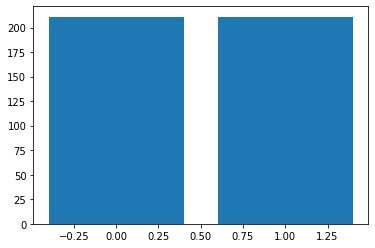

In [103]:
plt.bar(df_images_en_features['class_label'].value_counts().index, df_images_en_features['class_label'].value_counts().values)
plt.show()

We do some Explatory Data Analysis

In [143]:
df_images_en_features.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 48402 columns):
 #      Column       Dtype 
---     ------       ----- 
 0      0_x          object
 1      0_y          int8  
 2      1            int8  
 3      2            int8  
 4      3            int8  
 5      4            int8  
 6      5            int8  
 7      6            int8  
 8      7            int8  
 9      8            int8  
 10     9            int8  
 11     10           int8  
 12     11           int8  
 13     12           int8  
 14     13           int8  
 15     14           int8  
 16     15           int8  
 17     16           int8  
 18     17           int8  
 19     18           int8  
 20     19           int8  
 21     20           int8  
 22     21           int8  
 23     22           int8  
 24     23           int8  
 25     24           int8  
 26     25           int8  
 27     26           int8  
 28     27           int8  
 29     28           int

In [145]:
df_images_en_features.describe()

,0_y,1,2,3,4,5,6,7,8,9,...,48391,48392,48393,48394,48395,48396,48397,48398,48399,class_label
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,...,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,24.232227,23.580569,22.888626,21.800948,25.417062,27.601896,26.137441,30.670616,32.104265,30.625592,...,35.381517,38.251185,35.552133,34.973934,40.767773,39.625592,38.540284,44.672986,42.973934,0.500000
std,48.502400,52.148854,50.332381,50.142346,48.310914,43.771516,43.947011,47.694077,44.321794,43.449068,...,37.656706,40.176670,38.923591,38.006648,37.040622,42.307854,39.384541,35.871865,35.082621,0.500593
min,-127.000000,-123.000000,-125.000000,-124.000000,-124.000000,-126.000000,-128.000000,-128.000000,-123.000000,-128.000000,...,-128.000000,-128.000000,-127.000000,-126.000000,-128.000000,-128.000000,-123.000000,-128.000000,-127.000000,0.000000
25%,10.000000,-16.500000,-15.000000,-18.000000,8.000000,10.000000,10.000000,13.000000,14.000000,14.000000,...,20.000000,21.000000,19.250000,19.000000,20.000000,19.000000,20.000000,22.000000,21.000000,0.000000
50%,28.000000,28.000000,27.000000,25.500000,28.000000,30.000000,30.500000,33.500000,38.000000,34.000000,...,31.000000,30.000000,28.000000,27.500000,31.000000,31.000000,33.000000,36.500000,39.000000,0.500000
75%,53.000000,57.000000,56.000000,54.750000,56.500000,56.000000,54.750000,58.000000,60.000000,57.000000,...,51.000000,58.000000,54.000000,51.750000,62.000000,67.000000,63.000000,70.000000,66.750000,1.000000
max,127.000000,125.000000,126.000000,127.000000,127.000000,125.000000,127.000000,127.000000,126.000000,121.000000,...,125.000000,127.000000,127.000000,125.000000,126.000000,127.000000,127.000000,127.000000,126.000000,1.000000


In [146]:
df_images_en_features.describe().T

,count,mean,std,min,25%,50%,75%,max
0_y,422.0,24.232227,48.502400,-127.0,10.0,28.0,53.00,127.0
1,422.0,23.580569,52.148854,-123.0,-16.5,28.0,57.00,125.0
2,422.0,22.888626,50.332381,-125.0,-15.0,27.0,56.00,126.0
3,422.0,21.800948,50.142346,-124.0,-18.0,25.5,54.75,127.0
4,422.0,25.417062,48.310914,-124.0,8.0,28.0,56.50,127.0
...,...,...,...,...,...,...,...,...
48396,422.0,39.625592,42.307854,-128.0,19.0,31.0,67.00,127.0
48397,422.0,38.540284,39.384541,-123.0,20.0,33.0,63.00,127.0
48398,422.0,44.672986,35.871865,-128.0,22.0,36.5,70.00,127.0
48399,422.0,42.973934,35.082621,-127.0,21.0,39.0,66.75,126.0


From the data above, the data is balanced.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
#Standardizing the Input Features
from sklearn.preprocessing import StandardScaler

In [148]:
y = df_images_en_features['class_label']
X = df_images_en_features.drop('class_label', axis = 1)
X = df_images_en_features.drop('0_x', axis = 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)
# Separating the dependent and independent variable
  
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state = 40)
# Splitting the data into training and testing data

c:\Users\Samuel.Kizza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Samuel.Kizza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[[-1.5942283   1.50554623  0.67852666 ... -0.32579408 -0.08487004
   1.        ]
 [ 0.84152871  1.6975326   1.43440395 ... -0.60489497 -0.62709156
   1.        ]
 [ 0.0984164   0.14244297  0.12156445 ... -0.63280506  1.17080084
   1.        ]
 ...
 [ 0.51125657 -2.25738671  0.89733325 ... -0.66071515 -0.31317384
  -1.        ]
 [ 0.90345473  1.31355985  1.2951634  ... -0.91190595 -0.74124346
  -1.        ]
 [ 0.59382461  0.12324433  0.73820118 ... -0.82817568 -0.59855358
  -1.        ]]


In [138]:
print(y, y_test, y_train)

0      1
1      1
2      1
3      1
4      1
      ..
417    0
418    0
419    0
420    0
421    0
Name: class_label, Length: 422, dtype: int64 56     1
397    0
198    1
393    0
203    1
      ..
316    0
229    0
79     1
126    1
175    1
Name: class_label, Length: 127, dtype: int64 141    1
168    1
100    1
394    0
254    0
      ..
306    0
165    1
7      1
219    0
326    0
Name: class_label, Length: 295, dtype: int64


Train the model

In [141]:

K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [142]:
for keys, values in scores.items():
	print(keys, ':', values)


2 : [1.0, 1.0]
3 : [1.0, 1.0]
4 : [1.0, 1.0]
5 : [1.0, 1.0]
6 : [1.0, 1.0]
7 : [1.0, 1.0]
8 : [1.0, 1.0]
9 : [1.0, 1.0]
10 : [1.0, 1.0]
11 : [1.0, 1.0]
12 : [1.0, 1.0]
13 : [1.0, 1.0]
14 : [1.0, 1.0]
15 : [1.0, 1.0]
16 : [1.0, 1.0]
17 : [1.0, 1.0]
18 : [1.0, 1.0]
19 : [1.0, 1.0]
20 : [1.0, 1.0]


 Plotting the training and test scores graph

c:\Users\Samuel.Kizza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


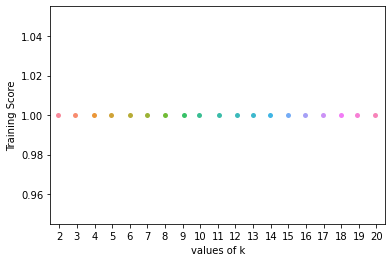

In [118]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')

plt.show()
# function to show plot


c:\Users\Samuel.Kizza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


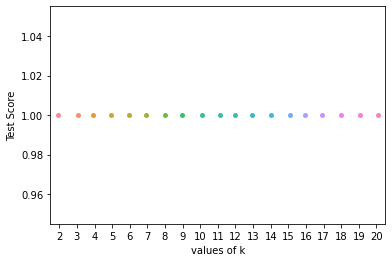

In [110]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()


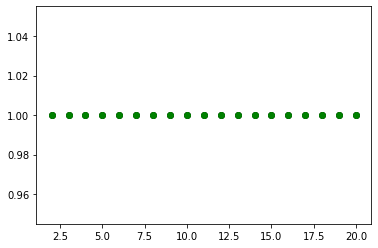

In [111]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# For overlapping scatter plots


Trying Naive bayes

In [149]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [150]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
